In [1]:
from vasicek import determ_rt, vasicek_zcb_call, vasicek_zcb_put, vasicek_rt_mean, vasicek_rt_var, determ_approx_rts, determ_approx_zcb, vasicek_zcb, determ_approx_option
import numpy as np
import matplotlib.pyplot as plt

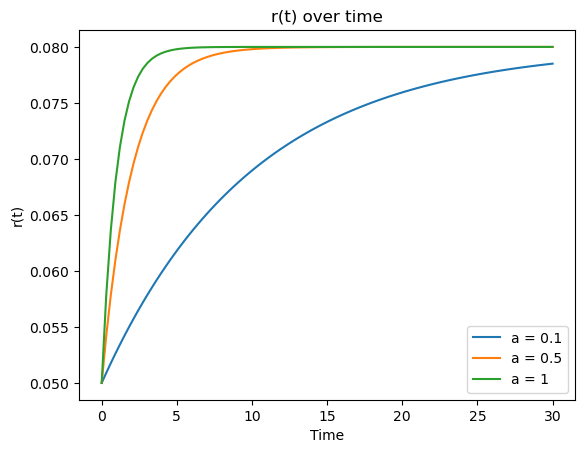

In [2]:
# e) Analysis
# i) Short rate variance

b = 0.08
r0 = 0.05
t = 0
T = 30
time = np.linspace(t, T, 100)

fig, ax = plt.subplots()
ax.plot(time, determ_rt(0.1, b, r0, time), label = 'a = 0.1')
ax.plot(time, determ_rt(0.5, b, r0, time), label = 'a = 0.5')
ax.plot(time, determ_rt(1, b, r0, time), label = 'a = 1')
ax.set_title("r(t) over time")
ax.set_xlabel("Time")
ax.set_ylabel("r(t)")
ax.legend()

From the graph, we can conclude that:

        As a increases, the graph converges to its endpoint quicker, i.e. the y-values increase more quickly.

        As t increases, the y value increases. So as time progresses, our r(t) becomes higher.

        sigma does not have an effect on r(t).

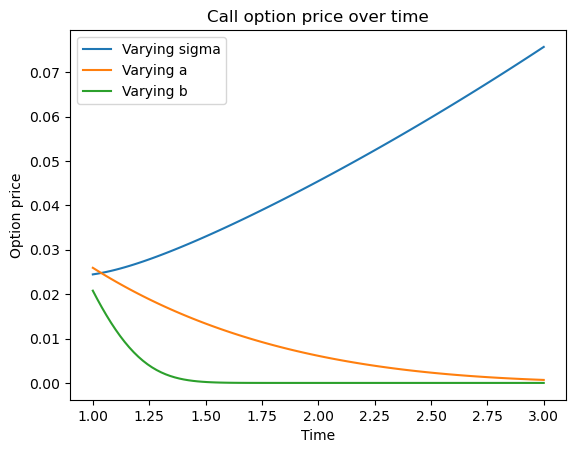

In [3]:
# ii) Option prices

a = 0.1
b = 0.08
sigma = 0.015
r0 = 0.05
TO = 1
TB = 3
K = 0.87

time = np.linspace(TO, TB, 100)
sigma_time = np.linspace(0.01, 0.085, 100)
a_time = b_time = np.linspace(0.1, 0.9, 100)

fig, ax = plt.subplots()
ax.plot(time, vasicek_zcb_call(a, b, sigma_time, r0, K, TO, TB), label = 'Varying sigma')
ax.plot(time, vasicek_zcb_call(a_time, b, sigma, r0, K, TO, TB), label = 'Varying a')
ax.plot(time, vasicek_zcb_call(a, b_time, sigma, r0, K, TO, TB), label = 'Varying b')
ax.set_title("Call option price over time")
ax.set_xlabel("Time")
ax.set_ylabel("Option price")
ax.legend()

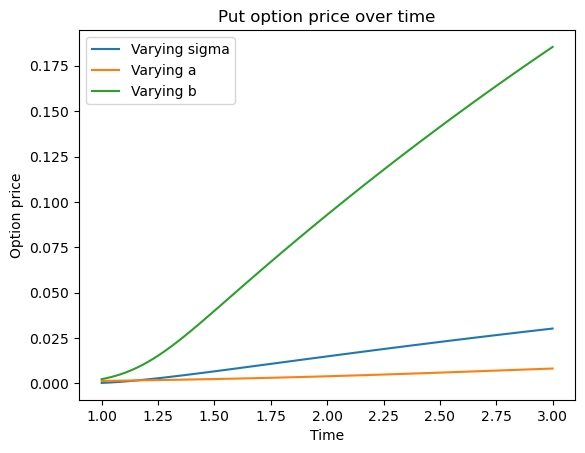

In [4]:
a = 0.1
b = 0.08
sigma = 0.015
r0 = 0.05
TO = 1
TB = 3
K = 0.87

time = np.linspace(TO, TB, 100)
sigma_time = np.linspace(0.01, 0.085, 100)
a_time = b_time = np.linspace(0.1, 0.9, 100)

fig, ax = plt.subplots()
ax.plot(time, vasicek_zcb_put(a, b, sigma_time, r0, K, TO, TB), label = 'Varying sigma')
ax.plot(time, vasicek_zcb_put(a_time, b, sigma, r0, K, TO, TB), label = 'Varying a')
ax.plot(time, vasicek_zcb_put(a, b_time, sigma, r0, K, TO, TB), label = 'Varying b')
ax.set_title("Put option price over time")
ax.set_xlabel("Time")
ax.set_ylabel("Option price")
ax.legend()

From the graphs above, we can conclude:

    For call options:

        As sigma increases, the price increases

        As a increases, the price steadily decreases

        As b increases, the price quickly converges to 0

    For put options:

        As sigma increases, the price slowly increases

        As a increases, the price does not change much

        As b increases, the price drastically increases

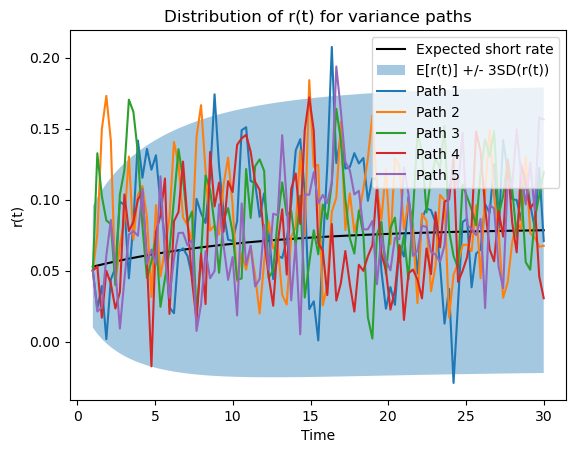

In [5]:
#2 Short rate simulation
# b) Graph checks

a = 0.1
b = 0.08
sigma = 0.015
r0 = 0.05
TO = 1
TB = 30
K = 0.87
time = np.linspace(TO, TB, 101)
std = np.sqrt(vasicek_rt_var(a, sigma, time))

fig, ax = plt.subplots()
ax.plot(time, vasicek_rt_mean(a, b, r0, time), color = 'black', label = 'Expected short rate')
ax.fill_between(time, vasicek_rt_mean(a, b, r0, time) + 3 * std, vasicek_rt_mean(a, b, r0, time) - 3 * std, alpha = 0.4, label = 'E[r(t)] +/- 3SD(r(t))')
ax.plot(time, determ_approx_rts(a, b, sigma, r0, 500, 100), label = 'Path 1')
ax.plot(time, determ_approx_rts(a, b, sigma, r0, 500, 100), label = 'Path 2')
ax.plot(time, determ_approx_rts(a, b, sigma, r0, 500, 100), label = 'Path 3')
ax.plot(time, determ_approx_rts(a, b, sigma, r0, 500, 100), label = 'Path 4')
ax.plot(time, determ_approx_rts(a, b, sigma, r0, 500, 100), label = 'Path 5')
ax.set_title('Distribution of r(t) for variance paths')
ax.set_xlabel('Time')
ax.set_ylabel('r(t)')
ax.legend()

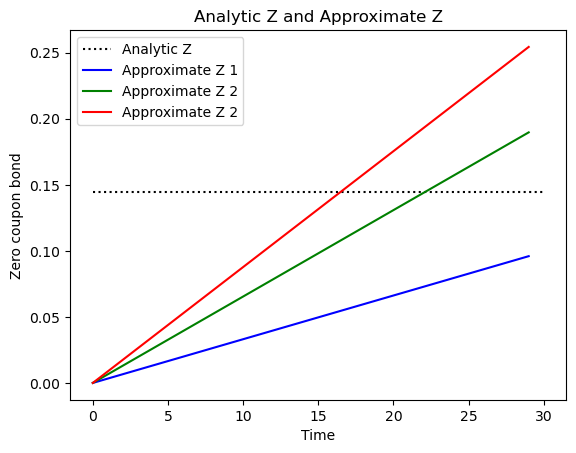

In [6]:
#3 Pricing instruments
# a) Reprice zero coupon bonds

a = 0.1
b = 0.08
sigma = 0.015
r0 = 0.05
t = 0
T = 30
K = 0.87
time = np.linspace(t, T, 100)

fig, ax = plt.subplots()
ax.hlines(vasicek_zcb(a, b, sigma, determ_rt(a, b, r0, t), t, T), xmin = t, xmax = T, label = 'Analytic Z', linestyle = 'dotted', color = 'black')
ax.plot(np.linspace(0, determ_approx_zcb(a, b, sigma, r0, t, T, 10), T), label = 'Approximate Z 1', color = 'blue')
ax.plot(np.linspace(0, determ_approx_zcb(a, b, sigma, r0, t, T, 10), T), label = 'Approximate Z 2', color = 'green')
ax.plot(np.linspace(0, determ_approx_zcb(a, b, sigma, r0, t, T, 10), T), label = 'Approximate Z 2', color = 'red')
ax.set_title('Analytic Z and Approximate Z')
ax.set_xlabel('Time')
ax.set_ylabel('Zero coupon bond')
ax.legend()

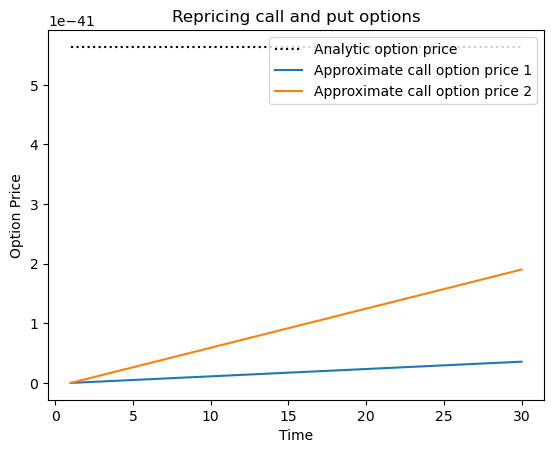

In [27]:
# b) Reprice call and put options

a = 0.1
b = 0.08
sigma = 0.015
r0 = 0.05
t = 1
T = 30
K = 0.87
time = np.linspace(t, T, 100)

fig, ax = plt.subplots()
ax.hlines(vasicek_zcb_call(a, b, sigma, r0, K, t, T), t, T, label = 'Analytic option price', linestyle = 'dotted', color = 'black')
ax.plot(time, np.linspace(0, determ_approx_option(determ_approx_rts(a, b, sigma, r0, T, 20), t, T, T / 20, vasicek_zcb_call(a, b, sigma, r0, K, t, T)), 100), label = 'Approximate call option price 1')
ax.plot(time, np.linspace(0, determ_approx_option(determ_approx_rts(a, b, sigma, r0, T, 20), t, T, T / 20, vasicek_zcb_call(a, b, sigma, r0, K, t, T)), 100), label = 'Approximate call option price 2')
#ax.plot(time, np.linspace(0, determ_approx_option(determ_approx_rts(a, b, sigma, r0, T, 20), t, T, T / 20, vasicek_zcb_put(a, b, sigma, r0, K, t, T)), 100), label = 'Approximate put option price 1')
#ax.plot(time, np.linspace(0, determ_approx_option(determ_approx_rts(a, b, sigma, r0, T, 20), t, T, T / 20, vasicek_zcb_put(a, b, sigma, r0, K, t, T)), 100), label = 'Approximate put option price 2')
ax.set_title('Repricing call and put options')
ax.set_xlabel('Time')
ax.set_ylabel('Option Price')
ax.legend()